# Simple Linear Regression Model
## Objective
As a result of completing this exercise you should be able to:

- Build a simple linear regression model using `scikit-learn` in Python
- Make plots using `matplotlib` in Python
- Load data in to Python using `pandas` in Python
- Understand simple linear regression model
- Interpret the learning model and the output 
- Briefly evaluate the regression model with mean square error 

## Import Libraries

Do this, if you prefer to import all the packages together in beginning of the notebook, and remember to run this cell first every time before you run other cells that need packages.

If you prefer to import packages one by one later, you can skip this section. Do remember to import packages when you need to use them in the latter cells.

In [1]:
# import packages for future use in this notebook 
# please import the packages you plan to use, if prefered
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Define a Function to Visualize the Data and Regression Model

In [2]:
# create a function to plot the training set and the regression line, the predictions
def lin_regplot(X, y, model):
    plt.scatter(X, y)
    plt.plot(X, model.predict(X), color='red', lw=2)
    return None

## Example - Simple Linear Regression with External Data

In this exercise, we will build a simple linear regression model to predict the price of a house (target value) based on the living area of that house (one feature of the house).

The exteranl data (i.e., 'housing_or.csv') includes information of 47 houses from Portland, Oregon. 


Data source:
The data are from Kaggle and more details as well as data description can be found at https://www.kaggle.com/kennethjohn/housingprice. (The dataset is the "housing_or.csv" on the website. The data include livining area, number of bedroom, and the price of 47 houses.)


### Preprocessing

#### Load Data

In [3]:
# load the data from csv to python as a DataFrame
housing_or = pd.read_csv("./datasets/housing_or.csv")

In [4]:
# check the shape of the DataFrame: rows and columns
print(housing_or.shape)

# check the dimension of the DataFrame
print(housing_or.ndim)

(47, 3)
2


In [5]:
# check the first few, five by default, lines of the data
housing_or.head()

,living_area_ft2,bedroom_num,price_usd1000
0,2104,3,3999.0
1,1600,3,3299.0
2,2400,3,3690.0
3,1416,2,2320.0
4,3000,4,5399.0


In [6]:
# check the last few, five by default, lines of the data
housing_or.tail()

,living_area_ft2,bedroom_num,price_usd1000
42,2567,4,3140.0
43,1200,3,2990.0
44,852,2,1799.0
45,1852,4,2999.0
46,1203,3,2395.0


##### Explore the Data 
To have some ideas about data and estimation about possible model before fitting the model. After fitting the model, you will be able to identify whether the model built making sense or not. 

In [7]:
# summarize of the variables in the DataFrame
housing_or.describe()

,living_area_ft2,bedroom_num,price_usd1000
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,3404.126596
std,794.702354,0.760982,1250.398996
min,852.000000,1.000000,1699.000000
25%,1432.000000,3.000000,2499.000000
50%,1888.000000,3.000000,2999.000000
75%,2269.000000,4.000000,3844.500000
max,4478.000000,5.000000,6999.000000


Questions:
- How many observations, instances, samples do you have? 47 samples
- How many features or variables, do you have for each sample? 3 features
- What are the column name for those features? living area, bedroom num, price usd
- Which one is the target value? price_usd1000
- Which one is the one feature we will use to answer our question in the example?living_area_ft2

array([[<AxesSubplot:title={'center':'living_area_ft2'}>,
        <AxesSubplot:title={'center':'bedroom_num'}>],
       [<AxesSubplot:title={'center':'price_usd1000'}>, <AxesSubplot:>]],
      dtype=object)

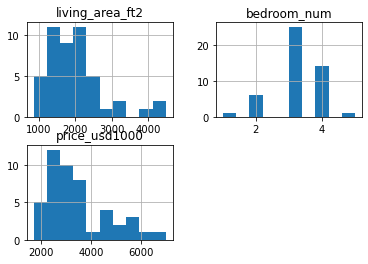

In [8]:
# visualize the data: display histogram of each variables
# using pandas 
housing_or.hist()

(array([ 5., 11.,  9., 11.,  5.,  1.,  2.,  0.,  1.,  2.]),
 array([ 852. , 1214.6, 1577.2, 1939.8, 2302.4, 2665. , 3027.6, 3390.2,
        3752.8, 4115.4, 4478. ]),
 <BarContainer object of 10 artists>)

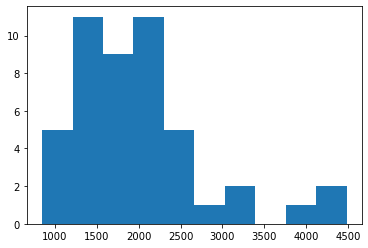

In [9]:
# visualize the data: display histogram of specific variable
# using matlibplot 
plt.hist(housing_or['living_area_ft2'])

array([[<AxesSubplot:xlabel='living_area_ft2', ylabel='living_area_ft2'>,
        <AxesSubplot:xlabel='bedroom_num', ylabel='living_area_ft2'>,
        <AxesSubplot:xlabel='price_usd1000', ylabel='living_area_ft2'>],
       [<AxesSubplot:xlabel='living_area_ft2', ylabel='bedroom_num'>,
        <AxesSubplot:xlabel='bedroom_num', ylabel='bedroom_num'>,
        <AxesSubplot:xlabel='price_usd1000', ylabel='bedroom_num'>],
       [<AxesSubplot:xlabel='living_area_ft2', ylabel='price_usd1000'>,
        <AxesSubplot:xlabel='bedroom_num', ylabel='price_usd1000'>,
        <AxesSubplot:xlabel='price_usd1000', ylabel='price_usd1000'>]],
      dtype=object)

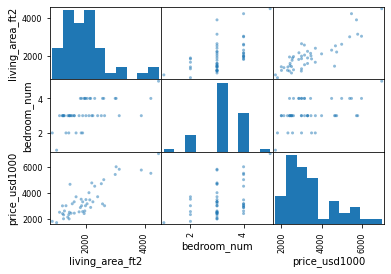

In [9]:
# visualize each variables and the relationship between each variables
from pandas.plotting import scatter_matrix
scatter_matrix(housing_or[['living_area_ft2','bedroom_num','price_usd1000']])

Text(0, 0.5, 'Price ($1000)')

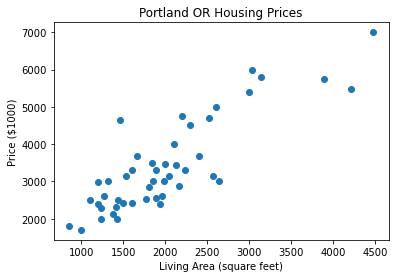

In [11]:
# visualize the realtionship between the feature and target
plt.scatter(housing_or['living_area_ft2'], housing_or['price_usd1000'])
plt.title("Portland OR Housing Prices")
plt.xlabel("Living Area (square feet)")
plt.ylabel("Price ($1000)")

Question:
- Do you think linear model could be good for the data? low data dimensionality, only target value and the value we are using to predict that value.
- Can you guess what the linear model would look like? (Where the line would be?) The line would be right in the middle of the data points, essentially diagonally through the graph

##### Assign Features and Target Values to Variables

In [10]:
# get the proper column using the index and assign the column to the proper variable
X = housing_or["living_area_ft2"].values
y = housing_or["price_usd1000"].values

In [11]:
# check the shape and dimension of the data
print(X.shape)
print(y.shape)

(47,)
(47,)


In [12]:
# reshape the features to a proper format (vector or matrix) for the learning model 
X = X.reshape(-1,1)
print(X.shape)

(47, 1)


#### Split training samples into training set and test set

In [13]:
# load necessary package and methods
from sklearn.model_selection import train_test_split

# split the training data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [14]:
X_train.shape

(37, 1)

### Learning - Training a Simple Linear Regression Model
Fit or train a simple regression model

In [15]:
# if you haven't loaded the package before, import the packages and methods
from sklearn.linear_model import LinearRegression

# build a linear regression model
# set the regression
slr_model = LinearRegression()

# fit the model with training set
slr_model.fit(X_train,y_train)


LinearRegression()

In [16]:
# show the result of learning: information about the model
print('intercept:', slr_model.intercept_)
print('slope:', slr_model.coef_)

print('score:', slr_model.score(X_train,y_train))

intercept: 590.8309582467928
slope: [1.4328676]
score: 0.7961165977468019


Question:
Given that our hypothsis or model is $h(\theta) = \theta_0 + \theta_1 x_1$
- What value is the $\theta_0$? 590.8309582467928
- What value is the $\theta_1$? 1.4328676
- What is the hypothesis or linear model built? $h(\theta)=$? 590.8309582467928 + 1.4328676x
- What does score mean? it refers to how accurate the regression is

### Prediction
Predict the target value for new x values (or new features)

Let's use the built model to estimate the price of a house with 3000 sqft living area

In [25]:
X_new = [[2519]]
print(slr_model.predict(X_new))

[4200.22443408]


Questions:
- What is the estimated price for a house with 3000 sqft? 4889.43374804
- How about a house with 2519 sqft? 4200.22443408
    

### Evaluation - Quick Evaluate the Models

#### Evaluate the system on the test set

In [26]:
# if you haven't loaded the package before, import the packages and methods
from sklearn.metrics import mean_squared_error

# get the predicted target based on the model and the feature in the training set
y_predicted_train = slr_model.predict(X_train)

In [27]:
# calculate the mean squared cost of the model
mse_train = mean_squared_error(y_train,y_predicted_train)
print(mse_train)

# calculate root mean square error 
rmse_train = np.sqrt(mse_train)
print(rmse_train)

337291.1786941739
580.7677493578426


#### Evaluate the system on the test set

In [31]:
# if you haven't loaded the package before, import the packages and methods
from sklearn.metrics import mean_squared_error

# get the predicted target based on the model and the feature in the training set
y_predicted_test = slr_model.predict(X_test)
y_predicted_train = slr_model.predict(X_train)

In [33]:
# calculate the mean squared cost of the model
mse_test = mean_squared_error(y_test,y_predicted_test)
print(mse_test)

mse_train = mean_squared_error(y_train,y_predicted_train)
print(mse_train)

# calculate root mean square error 
rmse_test = np.sqrt(mse_test)
print(rmse_test)

rmse_train = np.sqrt(mse_train)
print(rmse_train)

722378.1676462212
337291.1786941739
849.9283308880939
580.7677493578426


Question:
 - What does mean squared error mean? how far off regression line is from data points
 - Is it better to have a large mean squared error or small mean squared error? smaller
 - Compare the mean squared errors in the evaluation using training set and test set. Which one is larger? Does it make sense to you? (You may also take a look of the visualizations below.) The mean squared error of the testing data is larger.

### Visualization - Best Hypothesis and Data

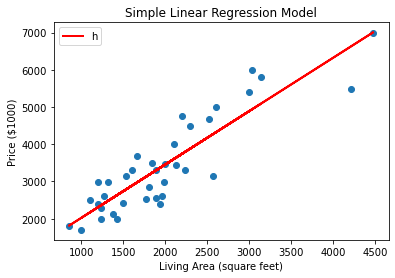

In [22]:
### visualization of the model and training set
lin_regplot(X_train,y_train,slr_model)
plt.title ("Simple Linear Regression Model")
plt.xlabel("Living Area (square feet)")
plt.ylabel("Price ($1000)")
plt.legend("h")


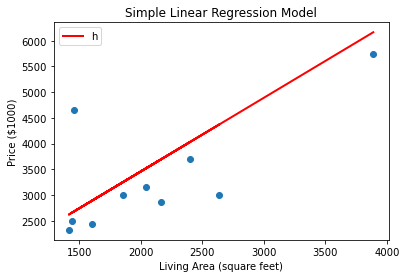

In [23]:
### visualization of the model and test set
lin_regplot(X_test,y_test,slr_model)
plt.title ("Simple Linear Regression Model")
plt.xlabel("Living Area (square feet)")
plt.ylabel("Price ($1000)")
plt.legend("h")

## Exercises - Simple Linear Regression with External Data

In the exercise, let's use the other feature (i.e., the number of bedroom) in the "housing_or.csv" data set to predict the housing price.

In addition to the genderal steps (preprocessing, learning, prediction), please also do the following steps.

Before fitting the hypothsis or model:
- Remember to use some plots to explore the relationship of the feature and the target
- Think about whether linear model is good for it

After learning the hypothesis or model:
- Briefly evluate your model with the mean square error 
- Plot the prediction line along with your data


### Preprocessing

#### Load Data

In [34]:
# load the data from csv to python as a DataFrame
housing_or = pd.read_csv("./datasets/housing_or.csv")

In [35]:
# check the shape of the DataFrame: rows and columns
print(housing_or.shape)

# check the dimension of the DataFrame
print(housing_or.ndim)

(47, 3)
2


In [36]:
# check the first few, five by default, lines of the data
housing_or.head()

,living_area_ft2,bedroom_num,price_usd1000
0,2104,3,3999.0
1,1600,3,3299.0
2,2400,3,3690.0
3,1416,2,2320.0
4,3000,4,5399.0


In [37]:
# check the last few, five by default, lines of the data
housing_or.tail()

,living_area_ft2,bedroom_num,price_usd1000
42,2567,4,3140.0
43,1200,3,2990.0
44,852,2,1799.0
45,1852,4,2999.0
46,1203,3,2395.0


##### Explore the Data 
To have some ideas about data and estimation about possible model before fitting the model. After fitting the model, you will be able to identify whether the model built making sense or not. 

In [38]:
# summarize of the variables in the DataFrame
housing_or.describe()

,living_area_ft2,bedroom_num,price_usd1000
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,3404.126596
std,794.702354,0.760982,1250.398996
min,852.000000,1.000000,1699.000000
25%,1432.000000,3.000000,2499.000000
50%,1888.000000,3.000000,2999.000000
75%,2269.000000,4.000000,3844.500000
max,4478.000000,5.000000,6999.000000


array([[<AxesSubplot:title={'center':'living_area_ft2'}>,
        <AxesSubplot:title={'center':'bedroom_num'}>],
       [<AxesSubplot:title={'center':'price_usd1000'}>, <AxesSubplot:>]],
      dtype=object)

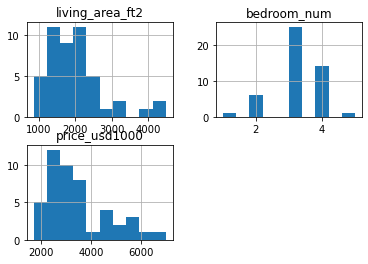

In [39]:
# visualize the data: display histogram of each variables
# using pandas 
housing_or.hist()

(array([ 5., 11.,  9., 11.,  5.,  1.,  2.,  0.,  1.,  2.]),
 array([ 852. , 1214.6, 1577.2, 1939.8, 2302.4, 2665. , 3027.6, 3390.2,
        3752.8, 4115.4, 4478. ]),
 <BarContainer object of 10 artists>)

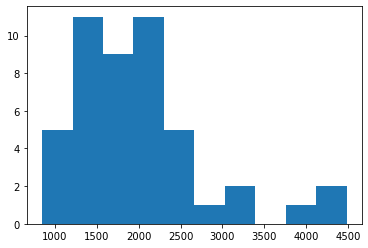

In [40]:
# visualize the data: display histogram of specific variable
# using matlibplot 
plt.hist(housing_or['living_area_ft2'])

array([[<AxesSubplot:xlabel='living_area_ft2', ylabel='living_area_ft2'>,
        <AxesSubplot:xlabel='bedroom_num', ylabel='living_area_ft2'>,
        <AxesSubplot:xlabel='price_usd1000', ylabel='living_area_ft2'>],
       [<AxesSubplot:xlabel='living_area_ft2', ylabel='bedroom_num'>,
        <AxesSubplot:xlabel='bedroom_num', ylabel='bedroom_num'>,
        <AxesSubplot:xlabel='price_usd1000', ylabel='bedroom_num'>],
       [<AxesSubplot:xlabel='living_area_ft2', ylabel='price_usd1000'>,
        <AxesSubplot:xlabel='bedroom_num', ylabel='price_usd1000'>,
        <AxesSubplot:xlabel='price_usd1000', ylabel='price_usd1000'>]],
      dtype=object)

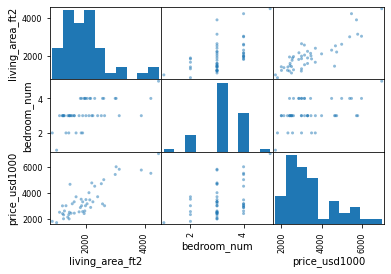

In [41]:
# visualize each variables and the relationship between each variables
from pandas.plotting import scatter_matrix
scatter_matrix(housing_or[['living_area_ft2','bedroom_num','price_usd1000']])

Text(0, 0.5, 'Price ($1000)')

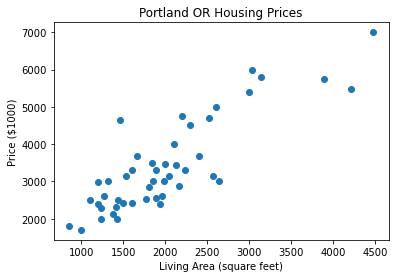

In [42]:
# visualize the realtionship between the feature and target
plt.scatter(housing_or['living_area_ft2'], housing_or['price_usd1000'])
plt.title("Portland OR Housing Prices")
plt.xlabel("Living Area (square feet)")
plt.ylabel("Price ($1000)")

##### Assign Features and Target Values to Variables

In [43]:
# get the proper column using the index and assign the column to the proper variable
X = housing_or["bedroom_num"].values
y = housing_or["price_usd1000"].values

In [44]:
# check the shape and dimension of the data
print(X.shape)
print(y.shape)

(47,)
(47,)


In [45]:
# reshape the features to a proper format (vector or matrix) for the learning model 
X = X.reshape(-1,1)
print(X.shape)

(47, 1)


#### Split training samples into training set and test set

In [46]:
# load necessary package and methods
from sklearn.model_selection import train_test_split

# split the training data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [47]:
X_train.shape

(37, 1)

### Learning - Training a Simple Regression Model
Fit or train a simple regression model

In [48]:
# if you haven't loaded the package before, import the packages and methods
from sklearn.linear_model import LinearRegression

# build a linear regression model
# set the regression
slr_model = LinearRegression()

# fit the model with training set
slr_model.fit(X_train,y_train)


LinearRegression()

In [49]:
# show the result of learning: information about the model
print('intercept:', slr_model.intercept_)
print('slope:', slr_model.coef_)

print('score:', slr_model.score(X_train,y_train))

intercept: 765.2939084507038
slope: [840.50491784]
score: 0.26576241002101897


### Prediction
Predict the target value for new x values (or new features)
Please pick a value for the number of bedroom you would like to make a prediction with

In [50]:
X_new = [[3]]
print(slr_model.predict(X_new))

[3286.80866197]


### Evaluation - Quick Evaluate the Models

In [51]:
# if you haven't loaded the package before, import the packages and methods
from sklearn.metrics import mean_squared_error

# get the predicted target based on the model and the feature in the training set
y_predicted_train = slr_model.predict(X_train)

In [52]:
# calculate the mean squared cost of the model
mse_train = mean_squared_error(y_train,y_predicted_train)
print(mse_train)

# calculate root mean square error 
rmse_train = np.sqrt(mse_train)
print(rmse_train)

1214673.9726170886
1102.1224853060066


#### Evaluate the system on the test set

In [53]:
# if you haven't loaded the package before, import the packages and methods
from sklearn.metrics import mean_squared_error

# get the predicted target based on the model and the feature in the training set
y_predicted_test = slr_model.predict(X_test)
y_predicted_train = slr_model.predict(X_train)

In [54]:
# calculate the mean squared cost of the model
mse_test = mean_squared_error(y_test,y_predicted_test)
print(mse_test)

mse_train = mean_squared_error(y_train,y_predicted_train)
print(mse_train)

# calculate root mean square error 
rmse_test = np.sqrt(mse_test)
print(rmse_test)

rmse_train = np.sqrt(mse_train)
print(rmse_train)

1328678.040698927
1214673.9726170886
1152.682974932365
1102.1224853060066


### Visualization - Best Hypothesis and Data

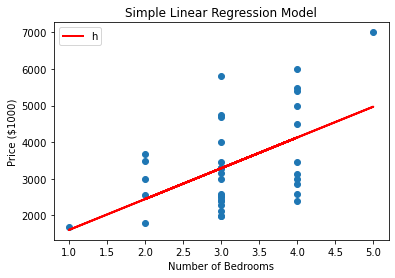

In [56]:
### visualization of the model and training set
lin_regplot(X_train,y_train,slr_model)
plt.title ("Simple Linear Regression Model")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price ($1000)")
plt.legend("h")

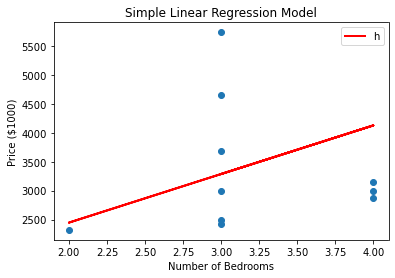

In [57]:
### visualization of the model and test set
lin_regplot(X_test,y_test,slr_model)
plt.title ("Simple Linear Regression Model")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price ($1000)")
plt.legend("h")

Questions:
- Do you think the number of bedroom alone is a good feature to use to predict the price of a house? No, because the data is not spread out and the predictions are not as accurate. 
- Comapring the evaluation of the model with the number of bedroom and that model with the living area, which model do you think performs better or makes better prediction? The model with the living area performs better. This can be seen in the mean squared errors.
